In [1]:
import pandas as pd
import numpy as np
import os, glob

filename = os.path.join(os.getcwd(), "WebPurchase", "purchase_records.txt")
df = pd.read_table(filename, header=None)
df.columns = ['ac_id','purchase_date']

In [2]:
df.head(10)

,ac_id,purchase_date
0,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,6/17/17
1,AC3c8d6ef5-098e-421f-aad4-a563817aa655,6/17/17
2,AC916c16ac-344c-4654-b461-0994faf15c93,6/17/17
3,ACfd2bc854-d75c-400f-b96e-c4930e876c0f,6/17/17
4,ACe9aa7f4e-0e40-454e-883f-b0adb2ec0055,6/17/17
5,ACf00c42d0-b71f-4ec5-bdeb-697e36eece24,6/17/17
6,AC08b4867c-6097-4527-afa6-2113dceb1fd4,6/17/17
7,AC43c46d79-e344-4498-ba2b-bd175f586128,6/17/17
8,ACde9adb6e-3030-4899-9247-0d9d9a95f2b5,6/17/17
9,ACbf8bdcac-10cf-4905-9748-38485c7da428,6/17/17


In [26]:
filename = os.path.join(os.getcwd(), "WebPurchase", "webvisit.txt")
df1 = pd.read_table(filename, header=None)
df1.columns = ['ac_id','webvisited_date','visited_page']
df1 = df1.replace(r'^\s*$', np.nan, regex=True)
df1.head(10)

,ac_id,webvisited_date,visited_page
0,AC6ebf5f05-f229-43d4-a810-2a8492180127,6/17/17,NaN
1,ACce4cd8ea-8b3d-4767-9609-b353d1f633c0,6/17/17,NaN
2,AC7d351059-47ef-4011-91d6-1ad803204854,6/17/17,MYACCOUNT
3,AC763265f0-40ac-400f-ad11-897ccdeb7d23,6/17/17,REWARDS
4,ACd89983be-b4e9-4e84-8936-f055f4ed3e7d,6/17/17,PRICINGENGINE
5,AC8ee59710-eb2f-4b48-a5c5-ae1627aba281,6/17/17,PRICINGENGINE
6,AC61169457-6279-428a-8414-ae968d891aa8,6/17/17,MYACCOUNT
7,AC2182f0dd-61f5-4f07-8144-44330b16a940,6/17/17,PRICINGENGINE
8,AC78b5ae75-a46c-4d84-a781-e29ba248ac52,6/17/17,MYACCOUNT
9,ACf5de13a2-16fa-4afe-be49-1d49c6ef6640,6/17/17,PRICINGENGINE


In [27]:
df.shape

(7229674, 2)

In [28]:
df1.shape

(1000000, 3)

Purchase records (df) much larger, contains whether customer made any purchase during the year. 

Web visit logs (df1) the history of customers at pages, not purchases.

In [29]:
df1_grouped_id = df1.groupby(['ac_id']).size().reset_index(name = 'visits')
df1_grouped_id

,ac_id,visits
0,AC00001abb-e40b-4a19-978d-cc6becf33489,2
1,AC000061e1-9f80-4765-8ad4-993d5ab83e39,2
2,AC000064d8-cb24-44c6-b4ed-0cafa86b8d3e,3
3,AC0000754d-ba7a-45ed-b9a1-629d0bb0060d,2
4,AC0000b6cd-f27e-4c73-8d97-3510b8192c84,1
...,...,...
603625,ACffff7058-c1a4-45ea-9e0e-ab2c55a1b1d0,2
603626,ACffff8281-2731-4676-8856-acf3a588cf73,1
603627,ACffff8d3a-da1a-40c9-b29e-d5ed32713d5d,1
603628,ACffffd50a-291a-4067-92ae-9f8e8c629a9e,2


In [30]:
df1_grouped_id = df1_grouped_id.drop(603629,axis=0)
df1_grouped_id

,ac_id,visits
0,AC00001abb-e40b-4a19-978d-cc6becf33489,2
1,AC000061e1-9f80-4765-8ad4-993d5ab83e39,2
2,AC000064d8-cb24-44c6-b4ed-0cafa86b8d3e,3
3,AC0000754d-ba7a-45ed-b9a1-629d0bb0060d,2
4,AC0000b6cd-f27e-4c73-8d97-3510b8192c84,1
...,...,...
603624,ACffff64ed-5e67-40ec-817d-4a05c62413e9,3
603625,ACffff7058-c1a4-45ea-9e0e-ab2c55a1b1d0,2
603626,ACffff8281-2731-4676-8856-acf3a588cf73,1
603627,ACffff8d3a-da1a-40c9-b29e-d5ed32713d5d,1


In [31]:
from functools import reduce
dfs = [df,df1]
df2 = reduce(lambda  left,right: pd.merge(left,right,on=['ac_id'],
                                               how='outer'), dfs)

In [32]:
df2.head(10)

,ac_id,purchase_date,webvisited_date,visited_page
0,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,6/17/17,11/16/17,REWARDS
1,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,6/17/17,6/22/18,REWARDS
2,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,6/1/18,11/16/17,REWARDS
3,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,6/1/18,6/22/18,REWARDS
4,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,2/19/18,11/16/17,REWARDS
5,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,2/19/18,6/22/18,REWARDS
6,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,4/4/18,11/16/17,REWARDS
7,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,4/4/18,6/22/18,REWARDS
8,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,8/22/17,11/16/17,REWARDS
9,AC6fe3b89d-437f-49ca-825a-b9d65f117f94,8/22/17,6/22/18,REWARDS


In [33]:
df2.shape

(10414416, 4)

10 million entries, multiple visits by customers, different purchase and web visit days. 

Feature to explore: possible correlation between the number of purchases and the number of website visits?

In [34]:
df2_grouped_id = df2.groupby(['ac_id']).size().reset_index(name = 'visit_count')
df2_grouped_id.head(10)

,ac_id,visit_count
0,AC000017b9-3e7d-4133-9e59-ddddcb4a911d,13
1,AC00001abb-e40b-4a19-978d-cc6becf33489,16
2,AC000061e1-9f80-4765-8ad4-993d5ab83e39,10
3,AC000064d8-cb24-44c6-b4ed-0cafa86b8d3e,24
4,AC0000754d-ba7a-45ed-b9a1-629d0bb0060d,12
5,AC0000a060-4516-40d8-8e0a-066fd231cad7,3
6,AC0000a2fa-f6bf-4fc9-afb6-448f14bdd6b1,8
7,AC0000b6cd-f27e-4c73-8d97-3510b8192c84,7
8,AC0000bef9-0845-4c93-bec5-6c1e6d7fbe19,5
9,AC00011dd2-4a5e-4539-96ee-ac0a958245a4,7


In [35]:
df2_grouped_id.shape

(899927, 2)

Missing (900k-899927 = 73) entries being visited website but any specific pages, possibly stayed on home page

In [36]:
df2_grouped_page = df2.groupby(['visited_page']).size().reset_index(name = 'visit_count')
df2_grouped_page.head(10)

,visited_page,visit_count
0,MYACCOUNT,2002676
1,PRICINGENGINE,2015997
2,REWARDS,2005252


In [37]:
df2['visited_page'].isna().sum()

4390491

Why are 4390491 occurances of visiting the site missing? Where are the customers visiting then? (Home page, bookmarked login, etc) Initial hypothesis that 73 entries were missing due to blank pages incorrect.

In [38]:
df2_grouped_id.tail(10)

,ac_id,visit_count
899917,ACffff5419-8e25-44a4-baea-0df7d062912b,4
899918,ACffff59ab-65c9-420a-9280-a4e33d676004,11
899919,ACffff64ed-5e67-40ec-817d-4a05c62413e9,18
899920,ACffff7058-c1a4-45ea-9e0e-ab2c55a1b1d0,22
899921,ACffff8281-2731-4676-8856-acf3a588cf73,10
899922,ACffff8d20-b401-4bff-8ec0-e308c20f9822,10
899923,ACffff8d3a-da1a-40c9-b29e-d5ed32713d5d,10
899924,ACffffd50a-291a-4067-92ae-9f8e8c629a9e,12
899925,ACffffef1f-cfbc-4973-8926-35ef7a1491ab,5
899926,ac_id,8


In [39]:
df2_grouped_id = df2_grouped_id.drop(899926,axis=0)
df2_grouped_id

,ac_id,visit_count
0,AC000017b9-3e7d-4133-9e59-ddddcb4a911d,13
1,AC00001abb-e40b-4a19-978d-cc6becf33489,16
2,AC000061e1-9f80-4765-8ad4-993d5ab83e39,10
3,AC000064d8-cb24-44c6-b4ed-0cafa86b8d3e,24
4,AC0000754d-ba7a-45ed-b9a1-629d0bb0060d,12
...,...,...
899921,ACffff8281-2731-4676-8856-acf3a588cf73,10
899922,ACffff8d20-b401-4bff-8ec0-e308c20f9822,10
899923,ACffff8d3a-da1a-40c9-b29e-d5ed32713d5d,10
899924,ACffffd50a-291a-4067-92ae-9f8e8c629a9e,12


Dropped last row, ac_id being just ac_id, visit count of 8. Remaining 74 entries of ac_id where?

In [40]:
df1.tail(10)

,ac_id,webvisited_date,visited_page
999990,AC616c65ce-3e64-4363-a330-4c474b27fe03,9/18/17,MYACCOUNT
999991,AC94814616-54bc-42ed-80dd-9c2b34ffc93f,9/18/17,NaN
999992,AC2ccd897c-c800-42f4-b0a7-a1bb266ea6b9,9/18/17,NaN
999993,AC386c9259-a3bb-450e-ab79-bfcccdff49dc,9/18/17,NaN
999994,AC48ae0cb6-6852-4abe-8255-59f65d049ab4,9/18/17,REWARDS
999995,AC7b85dd54-70e2-4c5a-a1cd-66dd15280f81,9/18/17,REWARDS
999996,ACa9452768-3319-4ffc-9506-1ac344e0017c,9/18/17,NaN
999997,ACc2db57f2-16cc-4593-8529-4890c37678ad,9/18/17,REWARDS
999998,AC93960bf7-a77a-4ff9-9c3a-9dc8cdba9d5a,9/18/17,MYACCOUNT
999999,ACc1913044-4541-4195-9d7a-5e2b138799e6,9/18/17,PRICINGENGINE


In [41]:
df1.dtypes

ac_id              object
webvisited_date    object
visited_page       object
dtype: object

In [42]:
rank_df2_id = df2_grouped_id.sort_values(['visit_count'],ascending=False)

In [43]:
rank_df2_id.head(10)

,ac_id,visit_count
357488,AC65877431-ef61-4ca2-bab9-b1051b90a3ec,126
84674,AC181c3d91-3cc3-4533-87d8-9e2bd3616076,112
642190,ACb68f3bc4-e37b-4ae0-8328-a1eb9edebc3a,105
432456,AC7ac3f792-1dd6-47f8-bd10-76579c903e6a,102
787740,ACdff06430-6233-4dd8-8acc-60a3bf003e2c,102
736036,ACd12eeb18-055f-4e76-8de8-e8dddddf357d,102
564114,ACa0428413-2017-4313-9a32-eb20d353a707,100
659044,ACbb4c4add-003c-425a-bfa0-f18ef6e46100,98
701970,ACc78d2e69-5d80-44f6-bcd8-ad8493db9456,96
390507,AC6ee10161-7bc1-40ee-b376-2b34b57451fc,96


In [44]:
rank_df2_id.shape

(899926, 2)

In [45]:
rank_df1_id = df1_grouped_id.sort_values(['visits'],ascending=False)
rank_df1_id.head(10)

,ac_id,visits
176171,AC4a8a9b9d-2b63-471b-a4ef-a9d63f1a5146,9
31373,AC0d562bd4-41b8-452d-b0c5-f0b4d0e1f3a7,9
58505,AC18cf8a0c-469f-4d9e-85a7-3d8683faf0fe,9
301542,AC7fae8a1e-262a-4559-93e8-39831962d3c9,8
48963,AC14be37e4-f9f6-4765-b60b-3605db0322ff,8
584179,ACf7b9d0d4-45b5-4796-818b-d38cfa3e7de9,8
146204,AC3df4dddc-2374-43d1-a739-ecab6fcd353b,8
355824,AC96a42313-e0e4-4e1c-b769-b8820b4c3505,8
150365,AC3fa9f600-ee16-4e9d-993c-69a196a9e739,8
523076,ACddc7710a-e5c7-4865-a853-9ab17b92170d,8


In [46]:
rank_df1_id.shape

(603629, 2)

Purchase records more visits than web visits, justified with size of df

In [47]:
dfs = [rank_df1_id,rank_df2_id]
visit_rank_df = reduce(lambda  left,right: pd.merge(left,right,on=['ac_id'],
                                               how='outer'), dfs)

In [48]:
visit_rank_df.head(10)

,ac_id,visits,visit_count
0,AC4a8a9b9d-2b63-471b-a4ef-a9d63f1a5146,9.0,72
1,AC0d562bd4-41b8-452d-b0c5-f0b4d0e1f3a7,9.0,81
2,AC18cf8a0c-469f-4d9e-85a7-3d8683faf0fe,9.0,72
3,AC7fae8a1e-262a-4559-93e8-39831962d3c9,8.0,64
4,AC14be37e4-f9f6-4765-b60b-3605db0322ff,8.0,72
5,ACf7b9d0d4-45b5-4796-818b-d38cfa3e7de9,8.0,24
6,AC3df4dddc-2374-43d1-a739-ecab6fcd353b,8.0,64
7,AC96a42313-e0e4-4e1c-b769-b8820b4c3505,8.0,64
8,AC3fa9f600-ee16-4e9d-993c-69a196a9e739,8.0,80
9,ACddc7710a-e5c7-4865-a853-9ab17b92170d,8.0,72


In [49]:
visit_rank_df.shape

(899926, 3)

In [50]:
visit_rank_df.isnull().sum()

ac_id               0
visits         296297
visit_count         0
dtype: int64

In [51]:
visit_rank_df.tail(10)

,ac_id,visits,visit_count
899916,ACa86cc2cf-d98d-4f9b-943d-c9570e277d84,NaN,1
899917,AC086aa463-b219-4ce6-8f30-211086e9e592,NaN,1
899918,ACc5553977-116c-4ddf-b326-0d453ad8b1ac,NaN,1
899919,AC162b32d5-f60e-46fe-bb7b-779b6e25944b,NaN,1
899920,AC31099182-62b9-4e16-9cad-d5d2bb266601,NaN,1
899921,ACa2a8c5b9-40e6-4fdc-9cbf-7ceea0cf4773,NaN,1
899922,ACa0b786e0-78c5-442f-bda4-ddbfdf3a8763,NaN,1
899923,AC31058f91-ac73-4885-a52a-25f9bb9c5518,NaN,1
899924,AC49dba85c-6f37-4cba-a1ea-d2a38a2c95e4,NaN,1
899925,ACb81ce591-372a-4141-993b-406fb90bb343,NaN,1


Confirms the difference in unique ac_id between purchase records and visitng the site is 296297

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

In [53]:
import scipy.stats as stats

In [54]:
visit_rank_df['label'] = stats.mstats.winsorize(visit_rank_df['visit_count'], limits=[0.01, 0.01])

In [55]:
visit_rank_df.head(10)

,ac_id,visits,visit_count,label
0,AC4a8a9b9d-2b63-471b-a4ef-a9d63f1a5146,9.0,72,40
1,AC0d562bd4-41b8-452d-b0c5-f0b4d0e1f3a7,9.0,81,40
2,AC18cf8a0c-469f-4d9e-85a7-3d8683faf0fe,9.0,72,40
3,AC7fae8a1e-262a-4559-93e8-39831962d3c9,8.0,64,40
4,AC14be37e4-f9f6-4765-b60b-3605db0322ff,8.0,72,40
5,ACf7b9d0d4-45b5-4796-818b-d38cfa3e7de9,8.0,24,24
6,AC3df4dddc-2374-43d1-a739-ecab6fcd353b,8.0,64,40
7,AC96a42313-e0e4-4e1c-b769-b8820b4c3505,8.0,64,40
8,AC3fa9f600-ee16-4e9d-993c-69a196a9e739,8.0,80,40
9,ACddc7710a-e5c7-4865-a853-9ab17b92170d,8.0,72,40


In [56]:
visit_count_diff = visit_rank_df['visit_count'] - visit_rank_df['label']
print(np.unique(visit_count_diff))

[-2 -1  0  2  4  5  6  8  9 10 11 12 14 15 16 17 20 23 24 25 26 28 30 32
 35 36 37 38 40 41 44 45 48 50 51 55 56 58 60 62 65 72 86]


In [57]:
nan_count = np.sum(visit_rank_df.isnull(),axis=0)
print(nan_count)

ac_id               0
visits         296297
visit_count         0
label               0
dtype: int64


In [58]:
visit_rank_df['visits_na'] = visit_rank_df['visits'].isnull()

In [60]:
mean_visit = visit_rank_df['visits'].mean()
visit_rank_df['visits'].fillna(value=mean_visit, inplace=True)

In [61]:
np.sum(visit_rank_df['visits'].isnull(), axis = 0)

0

Successful in replacing number of visits null values

In [62]:
visit_rank_df.corr()

,visits,visit_count,label,visits_na
visits,1.000000e+00,0.735898,0.731688,2.671267e-15
visit_count,7.358979e-01,1.000000,0.988500,-3.194550e-01
label,7.316881e-01,0.988500,1.000000,-3.302928e-01
visits_na,2.671267e-15,-0.319455,-0.330293,1.000000e+00


In [63]:
visit_rank_df.corr()['label']

visits         0.731688
visit_count    0.988500
label          1.000000
visits_na     -0.330293
Name: label, dtype: float64

In [64]:
exclude = ['label']
visit_rank_df.corr()['label'].drop(exclude,axis=0)

visits         0.731688
visit_count    0.988500
visits_na     -0.330293
Name: label, dtype: float64

In [65]:
corrs = visit_rank_df.corr()['label'].drop(exclude, axis = 0)
corrs_sorted = corrs.sort_values(ascending=False)
print(corrs_sorted)

visit_count    0.988500
visits         0.731688
visits_na     -0.330293
Name: label, dtype: float64


In [66]:
top_two_corr = corrs_sorted[0:2].tolist()
top_two_corr

[0.9884996936847787, 0.7316881456753451]

In [67]:
df_sub = visit_rank_df[['visit_count', 'visits', 'label']].copy()
df_sub

,visit_count,visits,label
0,72,9.000000,40
1,81,9.000000,40
2,72,9.000000,40
3,64,8.000000,40
4,72,8.000000,40
...,...,...,...
899921,1,1.656645,3
899922,1,1.656645,3
899923,1,1.656645,3
899924,1,1.656645,3


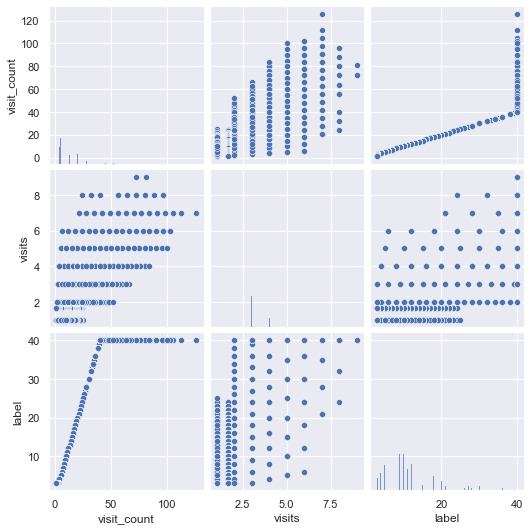

In [68]:
sns.pairplot(data=df_sub)